# "Euphotic zone residence time of Antarctic Bottom Water"

### Code for Figure 3 probability density plots
Euphotic zone residence time of Lagrangian particles.

Corresponding to Yinghuan Xie (yinghuan.xie@utas.edu.au)

In [1]:
# Define the threshld for euphotic zone PAR in (watts per square metres)
PARZ_thre = 0.443

In [2]:
# Importing the relevant modules. 
import numpy as np
import xarray as xr
import os
import re
from glob import glob
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cosima_cookbook as cc
session =cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'
from os import sys
sys.path.append('/home/581/yx9454/PhD_Ch1')
from My_Py_Func import Ch1_defs as c1d

In [4]:
# In each experiment, we define 06-18, release-06, 05-release, 87-05,
# loop_start_point-87 (if availiable) as No 0,1,2,3,4(if availiable)

master_path = '/g/data/jk72/yx9454/runs/parcels/output_after_Aug/'
traj_input = {'MLS_ON':[{'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Following_MLS_ON/'},
                        {'out_freq': 5,
                        'exp_path':'CORE_Curtain_Forward(out_freq=5days)_Jan-Dec_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Jan-Dec_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_MLS_ON/'},
                        {'out_freq': 0.25,
                        'exp_path':'CORE_Curtain_Backwards(out_freq=6hrs)_Following_Loop_MLS_ON/'}],
}

In [5]:
Chl_a_ver = 'Chl-a_based_on_OCCCI_v6'
var_in_arrs_0,var_in_arrs_1,var_in_arrs_2,var_in_arrs_3,var_in_arrs_4 = {},{},{},{},{}

for exp_name in ['MLS_ON']:
    files = sorted(glob('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/'+Chl_a_ver+'/var_in_arrs_*.npz'))

    var_in_arrs_list = [var_in_arrs_0,var_in_arrs_1,var_in_arrs_2,var_in_arrs_3,var_in_arrs_4]
    for i in [0,1,2,3,4]:
        print(files[i])
        for pvar in ['PARS','PARZ','Pt_ind']:
            PVAR   = np.load(files[i])[pvar]
            var_in_arrs_list[i][exp_name+'_'+pvar]=PVAR
            print(pvar,' loaded')

/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_0_AABW_only_PARS_Z.npz
PARS  loaded
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_1_AABW_only_PARS_Z.npz
PARS  loaded
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_2_AABW_only_PARS_Z.npz
PARS  loaded
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_3_AABW_only_PARS_Z.npz
PARS  loaded
PARZ  loaded
Pt_ind  loaded
/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/Chl-a_based_on_OCCCI_v6/var_in_arrs_4_AABW_only_PARS_Z.npz
PARS  loaded
PARZ  loaded
Pt_ind  loaded


In [6]:
MLS_ON_stopsign_list   = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/MLS_ON/stopsign_list_for_20yrs_150m_thre.npz')['stopsign_list']
CDW_inds_MLS_ON   = ~(np.isnan(MLS_ON_stopsign_list))

In [7]:
total_shallower_than_EZD_days_back_only = {}
total_shallower_than_EZD_days           = {}

In [8]:
for exp_name in ['MLS_ON']:
    # Backwards following
    #total_seconds = (T1 - dt.datetime(1970,1,1)).total_seconds()
    ind_t = -1
    out_freq = traj_input[exp_name][3]['out_freq']
    following    = np.sum(var_in_arrs_3[exp_name+'_PARZ'][:,:ind_t]>PARZ_thre,axis=1)*out_freq

    # Backwards first year
    out_freq = traj_input[exp_name][2]['out_freq']
    first_yr = np.sum((var_in_arrs_2[exp_name+'_PARZ'][:,:]>PARZ_thre),axis=1)*out_freq

    #The loop exp, starts from 2018-12-1
    ind_t = -1

    out_freq = traj_input[exp_name][4]['out_freq']
    loop = np.sum((var_in_arrs_4[exp_name+'_PARZ'][:,:ind_t]>PARZ_thre),axis=1)*out_freq

    # Forwards first year
    if True:
        out_freq = traj_input[exp_name][0]['out_freq']
        following_forward = np.sum((var_in_arrs_0[exp_name+'_PARZ'][:,:]>PARZ_thre),axis=1)*out_freq

    # Forwards following
    if True:
        ind_t = -1
        out_freq = traj_input[exp_name][1]['out_freq']
        first_yr_forward = np.sum((var_in_arrs_1[exp_name+'_PARZ'][:,:ind_t]>PARZ_thre),axis=1)*out_freq

    total_shallower_than_EZD_days_back_only[exp_name] = following + first_yr + loop
    total_shallower_than_EZD_days[exp_name]           = following + first_yr + following_forward + first_yr_forward + loop

MLS_ON
Eligible AABW: 40993 particles
Eligible AABW: 0.428365417550407 years
Eligible AABW also in CDW: 36141 particles
Eligible AABW also in CDW: 0.39290368810439175 years


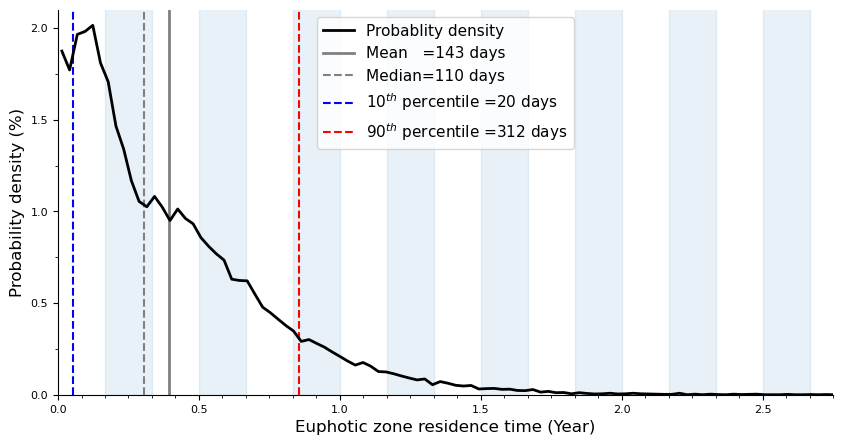

In [14]:
exp_names = ['MLS_ON']
CDW_inds_s = [CDW_inds_MLS_ON]
hist_freq = 10/365 #(yr)
# Final Figure2
plt.figure(figsize=(10,5))

ax = plt.subplot(1, 1, 1)
for i in [0]:
    exp_name = exp_names[i]
    CDW_inds= CDW_inds_s[i] 
    print(exp_name)
    AABW_shallower_than_EZD =  (total_shallower_than_EZD_days[exp_name]>0)
    print('Eligible AABW:',sum(AABW_shallower_than_EZD),'particles')
    print('Eligible AABW:',np.nanmean(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD])/365,'years')

    AABW_shallower_than_EZD_plus_CDW =  (total_shallower_than_EZD_days[exp_name]>0) & (CDW_inds)
    print('Eligible AABW also in CDW:',sum(AABW_shallower_than_EZD_plus_CDW),'particles')
    print('Eligible AABW also in CDW:',np.nanmean(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW])/365,'years')
    #
    if exp_name in ['MLS_ON']:
        hist1 = np.histogram(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365,bins=np.arange(0,50,hist_freq),density= True)
        mean1 = np.mean(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365)
        median1 = np.median(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365)
        p10 = np.percentile(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365,10)
        p90 = np.percentile(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365,90)
        
        #plt.plot(((hist1[1][1:]+hist1[1][:-1])/2),hist1[0], zorder=10,label='Max ML Shuffling \n (Mean='+str(int(mean1*365))+'days)',color='k',linewidth=2)
        plt.plot(((hist1[1][1:]+hist1[1][:-1])/2),hist1[0], zorder=10,color='k',linewidth=2,label='Probablity density')
        plt.plot(np.ones(10)*mean1,
                np.arange(0,40000,4000),'grey',linewidth=2,label='Mean   ='+str(int(mean1*365))+' days')
        plt.plot(np.ones(10)*median1,
                np.arange(0,40000,4000),'--',color='grey',linewidth=1.5,label= 'Median='+str(int(median1*365))+' days')
        plt.plot(np.ones(10)*p10,
                np.arange(0,40000,4000),'--',color='b',linewidth=1.5,label='10$^{th}$ percentile ='+str(int(p10*365))+' days')
        plt.plot(np.ones(10)*p90,
                np.arange(0,40000,4000),'--',color='r',linewidth=1.5,label='90$^{th}$ percentile ='+str(int(p90*365))+' days')

# Plot the shaded range
for i in np.arange(2,40,4):
    plt.fill_between([i/12,(i+2)/12], [0,0],[3,3], alpha=0.1,zorder=0,color='C0')

#plt.ylim([0,hist2[0].max()])
plt.ylim([0,2.1])
plt.xlim([0,2.75])

majors = np.arange(0,3,0.5)
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.arange(0,3,1/12)
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))

majors = np.arange(0,3,0.5)
ax.yaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.arange(0,3,1/4)
ax.yaxis.set_minor_locator(ticker.FixedLocator(minors))

plt.legend(fontsize=11,loc='upper center')
plt.xlabel('Euphotic zone residence time (Year)',fontsize=12)
plt.ylabel('Probability density (%)',fontsize=12)

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Figure_3_Probability_density.png',dpi=500)

MLS_ON
Eligible AABW: 40993 particles
Eligible AABW: 0.428365417550407 years
Eligible AABW also in CDW: 36141 particles
Eligible AABW also in CDW: 0.39290368810439175 years


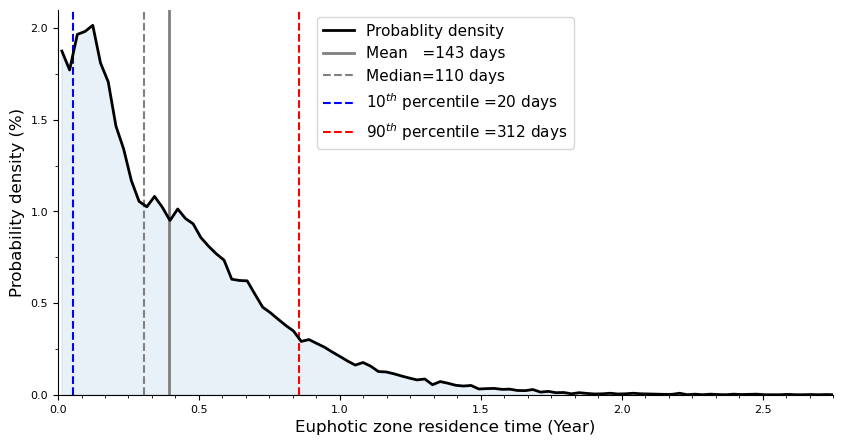

In [15]:
#Ver2
exp_names = ['MLS_ON']
CDW_inds_s = [CDW_inds_MLS_ON]
hist_freq = 10/365 #(yr)
# Final Figure2
plt.figure(figsize=(10,5))

ax = plt.subplot(1, 1, 1)
for i in [0]:
    exp_name = exp_names[i]
    CDW_inds= CDW_inds_s[i] 
    print(exp_name)
    AABW_shallower_than_EZD =  (total_shallower_than_EZD_days[exp_name]>0)
    print('Eligible AABW:',sum(AABW_shallower_than_EZD),'particles')
    print('Eligible AABW:',np.nanmean(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD])/365,'years')

    AABW_shallower_than_EZD_plus_CDW =  (total_shallower_than_EZD_days[exp_name]>0) & (CDW_inds)
    print('Eligible AABW also in CDW:',sum(AABW_shallower_than_EZD_plus_CDW),'particles')
    print('Eligible AABW also in CDW:',np.nanmean(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW])/365,'years')
    #
    if exp_name in ['MLS_ON']:
        hist1 = np.histogram(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365,bins=np.arange(0,50,hist_freq),density= True)
        mean1 = np.mean(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365)
        median1 = np.median(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365)
        p10 = np.percentile(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365,10)
        p90 = np.percentile(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW]/365,90)
        
        #plt.plot(((hist1[1][1:]+hist1[1][:-1])/2),hist1[0], zorder=10,label='Max ML Shuffling \n (Mean='+str(int(mean1*365))+'days)',color='k',linewidth=2)
        plt.plot(((hist1[1][1:]+hist1[1][:-1])/2),hist1[0], zorder=10,color='k',linewidth=2,label='Probablity density')

        # Fill the area below the curve
        plt.fill_between(((hist1[1][1:]+hist1[1][:-1])/2),hist1[0], where=(hist1[0] >= 0), interpolate=True,  alpha=0.1,zorder=0,color='C0')

        
        plt.plot(np.ones(10)*mean1,
                np.arange(0,40000,4000),'grey',linewidth=2,label='Mean   ='+str(int(mean1*365))+' days')
        plt.plot(np.ones(10)*median1,
                np.arange(0,40000,4000),'--',color='grey',linewidth=1.5,label= 'Median='+str(int(median1*365))+' days')
        plt.plot(np.ones(10)*p10,
                np.arange(0,40000,4000),'--',color='b',linewidth=1.5,label='10$^{th}$ percentile ='+str(int(p10*365))+' days')
        plt.plot(np.ones(10)*p90,
                np.arange(0,40000,4000),'--',color='r',linewidth=1.5,label='90$^{th}$ percentile ='+str(int(p90*365))+' days')




#plt.ylim([0,hist2[0].max()])
plt.ylim([0,2.1])
plt.xlim([0,2.75])

majors = np.arange(0,3,0.5)
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.arange(0,3,1/12)
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))

majors = np.arange(0,3,0.5)
ax.yaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.arange(0,3,1/4)
ax.yaxis.set_minor_locator(ticker.FixedLocator(minors))

plt.legend(fontsize=11,loc='upper center')
plt.xlabel('Euphotic zone residence time (Year)',fontsize=12)
plt.ylabel('Probability density (%)',fontsize=12)

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Figure_3_Probability_density_ver2.png',dpi=500)

## Build the 4 regions mask

In [11]:
print('point munber along contour:',933504/(12*13))
region_no = (np.array(list(np.arange(1,5985))*13*12)/300).astype(int)+1
wedd_ind =  (region_no<=15) & (region_no>=12)
print('wedd_ind',sum(wedd_ind))
prydz_ind =  (region_no==20) | (region_no==1)
print('prydz_ind',sum(prydz_ind))
adelie_ind =  (region_no<=4) & (region_no>=3)
print('adelie_ind',sum(adelie_ind))
ross_ind =  (region_no<=7) & (region_no>=5)
print('wedd_ind',sum(wedd_ind))

point munber along contour: 5984.0
wedd_ind 187200
prydz_ind 91104
adelie_ind 93600
wedd_ind 187200


In [12]:
AABW_inds_s = {}
for exp_name in ['MLS_ON']:
    AABW_inds_s[exp_name] = np.load('/g/data/jk72/yx9454/PAR_from_iaf_cycle4/'+exp_name+'/AABW_inds.npz')['AABW_inds']

MLS_ON
Weddell_Sea
MLS_ON
Prydz_Bay
MLS_ON
Adelie_Coast
MLS_ON
Ross_Sea


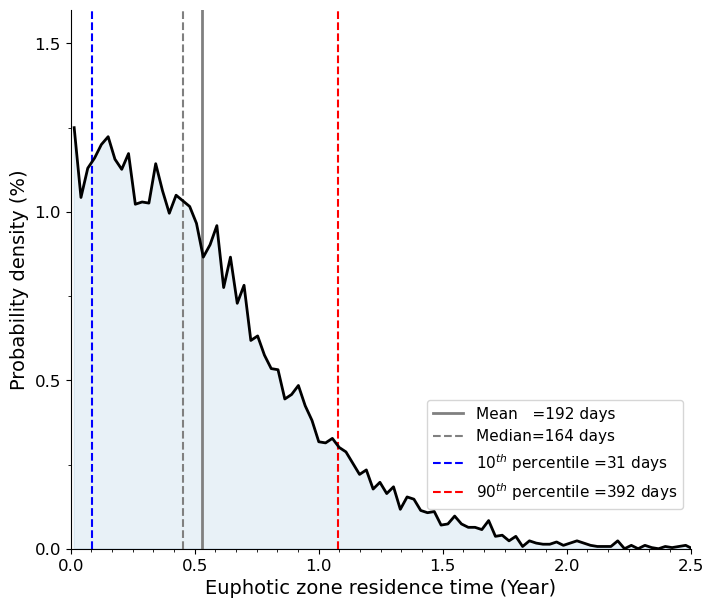

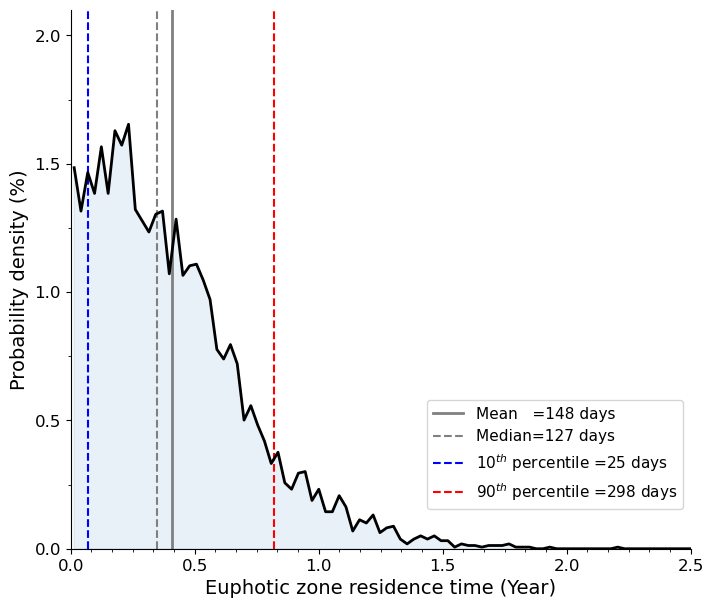

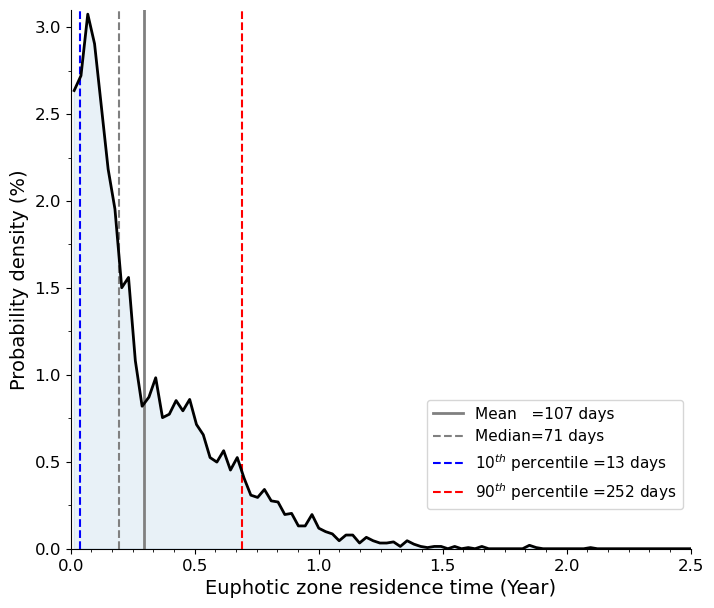

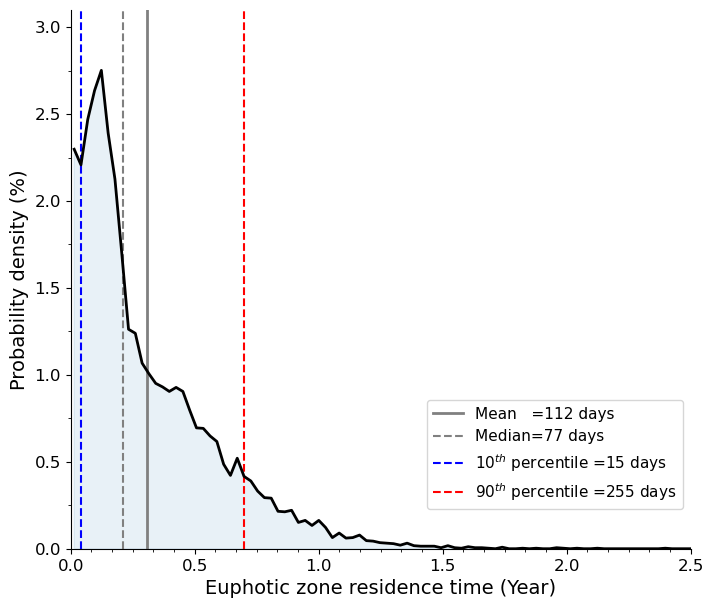

In [16]:
region_names=['Weddell_Sea','Prydz_Bay','Adelie_Coast','Ross_Sea']
region_inds = [wedd_ind,prydz_ind,adelie_ind,ross_ind]

for ii in [0,1,2,3]:
    region_name = region_names[ii]
    
    exp_names = ['MLS_ON']
    CDW_inds_s = [CDW_inds_MLS_ON]
    hist_freq = 10/365 #(yr)
    
    # Final Figure2
    plt.figure(figsize=(8,7))

    ax = plt.subplot(1, 1, 1)
    for i in [0]:
        exp_name = exp_names[i]
        CDW_inds= CDW_inds_s[i] 
        print(exp_name)
        print(region_name)
        AABW_shallower_than_EZD =  (total_shallower_than_EZD_days[exp_name]>0)

        AABW_shallower_than_EZD_plus_CDW =  (total_shallower_than_EZD_days[exp_name]>0) & (CDW_inds)
        #
            
        if exp_name in ['MLS_ON']:
            region_inds_AABW = region_inds[ii]
            region_inds_AABW = region_inds_AABW[AABW_inds_s[exp_name]]
            
            hist1 = np.histogram(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW & region_inds_AABW]/365,bins=np.arange(0,50,hist_freq),density= True)
            mean1 = np.mean(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW & region_inds_AABW]/365)
            median1 = np.median(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW & region_inds_AABW]/365)
            p10 = np.percentile(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW & region_inds_AABW]/365,10)
            p90 = np.percentile(total_shallower_than_EZD_days[exp_name][AABW_shallower_than_EZD_plus_CDW & region_inds_AABW]/365,90)

            #plt.plot(((hist1[1][1:]+hist1[1][:-1])/2),hist1[0], zorder=10,label='Max ML Shuffling \n (Mean='+str(int(mean1*365))+'days)',color='k',linewidth=2)
            plt.plot(((hist1[1][1:]+hist1[1][:-1])/2),hist1[0], zorder=10,color='k',linewidth=2)
            # Fill the area below the curve
            plt.fill_between(((hist1[1][1:]+hist1[1][:-1])/2),hist1[0], where=(hist1[0] >= 0), interpolate=True,  alpha=0.1,zorder=0,color='C0')

            plt.plot(np.ones(10)*mean1,
                    np.arange(0,40000,4000),'grey',linewidth=2,label='Mean   ='+str(int(mean1*365))+' days')
            plt.plot(np.ones(10)*median1,
                    np.arange(0,40000,4000),'--',color='grey',linewidth=1.5,label= 'Median='+str(int(median1*365))+' days')
            plt.plot(np.ones(10)*p10,
                np.arange(0,40000,4000),'--',color='b',linewidth=1.5,label='10$^{th}$ percentile ='+str(int(p10*365))+' days')
            plt.plot(np.ones(10)*p90,
                np.arange(0,40000,4000),'--',color='r',linewidth=1.5,label='90$^{th}$ percentile ='+str(int(p90*365))+' days')

    # Plot the shaded range
    #for i in np.arange(2,30,4):
    #   plt.fill_between([i/12,(i+2)/12], [0,0],[4,4], alpha=0.1,zorder=0,color='C0')

    
    #plt.ylim([0,hist2[0].max()])
    if region_name in ['Adelie_Coast','Ross_Sea']:
        plt.ylim([0,3.1])
    elif region_name in ['Weddell_Sea']:
        plt.ylim([0,1.6])
    else:
        plt.ylim([0,2.1])
    plt.xlim([0,2.5])

    majors = np.arange(0,3,0.5)
    ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
    minors = np.arange(0,3,1/12)
    ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))

    majors = np.arange(0,5,0.5)
    ax.yaxis.set_major_locator(ticker.FixedLocator(majors))
    minors = np.arange(0,5,1/4)
    ax.yaxis.set_minor_locator(ticker.FixedLocator(minors))
    
    # Remove the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.legend(fontsize=11,loc='lower right',bbox_to_anchor=(1, 0.06))
    plt.xlabel('Euphotic zone residence time (Year)',fontsize=14)
    plt.ylabel('Probability density (%)',fontsize=14)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    plt.savefig('Figure_3_Probability_density_'+region_name+'_ver2.png',dpi=500)